In [1]:
import pandas as pd
df = pd.read_csv('credit_card_data_uml.csv', header=1)

In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Cleaning --------------------------------


In [3]:
df.rename({'default payment next month': 'default'},
          axis='columns', inplace=True)

In [4]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Missing Data

df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

### With the help of Data Wrangler extension, found out that there are additional numeric values for Education and Marriage compared to given UCI dataset description. I am considering as missing data for these values.


In [6]:
# suppose to have 1, 2, 3, 4 form the doucumentaiton
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [7]:
# suppose to have 1, 2, 3 form the doucumentaiton
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [8]:
# Dealing with missing data --------------------------------
len(df[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [9]:
df = df[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [10]:
len(df)

29932

## Downsample the data

### Around 30k data is large number for SVM. As SVM is great with the small datasets and it takes a long time to optimize with Cross-Validation for this data, so we downsample it.


In [11]:
df_default = df[df['default'] == 0]
df_no_default = df[df['default'] == 1]

In [12]:
from sklearn.utils import resample
df_default_downsample = resample(
    df_default, replace=False, n_samples=1000, random_state=42)

df_no_default_downsample = resample(
    df_no_default, replace=False, n_samples=1000, random_state=42)

df_downsampled = pd.concat([df_no_default_downsample, df_default_downsample])

In [13]:
len(df_downsampled)

2000

## Data Formating


In [14]:
X = df_downsampled.drop('default', axis=1).copy()
y = df_downsampled['default'].copy()

In [15]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19982,300000,2,1,1,47,3,2,2,2,2,...,5000,5000,5000,5000,0,0,0,0,0,0
19350,80000,2,2,2,36,2,0,0,-2,-2,...,0,0,0,0,1700,0,0,0,0,0
17057,30000,2,3,2,22,2,2,0,0,0,...,29047,29507,11609,11711,0,1687,1147,524,400,666
26996,80000,1,1,2,34,2,2,2,2,2,...,63827,64682,65614,67007,2800,3000,2500,2600,2600,2600
23621,210000,2,3,1,44,-2,-2,-2,-2,-2,...,17706,0,5646,14793,13462,17706,0,5646,14793,7376


#### Variable information

X1: Amount of the given credit.

X2: Gender
1 = male
2 = female

X3: Education
1 = graduate school
2 = university
3 = high school
4 = others

X4: Marital status
1 = married
2 = single
3 = others

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records
-1 = pay duly
1 = payment delay for one month
2 = payment delay for two months
.....
8 = payment delay for eight months
9 = payment delay for nine months and above.

X12-X17: Amount of bill statement in previous months.

X18-X23: Amount of previous payment.


In [16]:
# let's convert the continous cateforiacal data to different catagories

# onehot encoding

X = pd.get_dummies(X, columns=[
                   'SEX', 'MARRIAGE', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']).astype(int)

In [17]:
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000,47,5000,5000,5000,5000,5000,5000,0,0,...,0,0,0,0,1,0,0,0,0,0
19350,80000,36,19671,20650,0,0,0,0,1700,0,...,0,1,0,0,0,0,0,0,0,0
17057,30000,22,29793,29008,29047,29507,11609,11711,0,1687,...,0,0,0,1,0,0,0,0,0,0
26996,80000,34,61231,62423,63827,64682,65614,67007,2800,3000,...,0,0,0,0,1,0,0,0,0,0
23621,210000,44,11771,13462,17706,0,5646,14793,13462,17706,...,0,1,0,0,0,0,0,0,0,0


In [18]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Scaling and centering the data
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Build A Preliminary SVM model.


In [20]:
from sklearn import svm

svm_clf = svm.SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

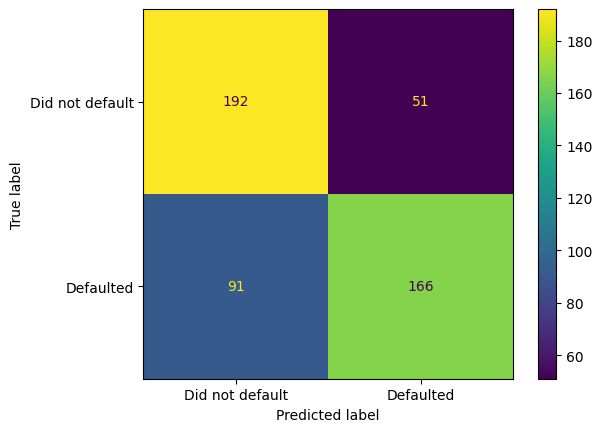

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = svm_clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
                       "Did not default", "Defaulted"]).plot()
plt.show()

## Optimize the Parameters with Cross Validation and GridSearchCV()


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.5, 1, 10, 100],
               'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
               'kernel': ['rbf']}]

# accuracy is default for scoring, remaining options does not perfomed well
optimal_param = GridSearchCV(
    svm.SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
optimal_param.fit(X_train_scaled, y_train)
print(optimal_param.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.

## Building, Evaluating, Drawing, and Interpreting the Final SVM


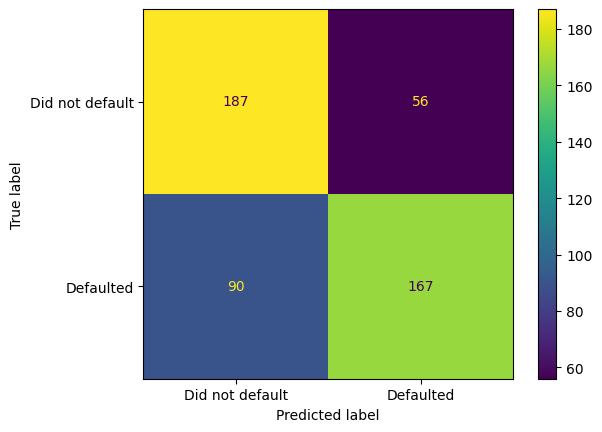

In [23]:
# Now let's build the model again with the new parameters...

svm_clf = svm.SVC(random_state=42, C=100, gamma=0.001)
svm_clf.fit(X_train_scaled, y_train)

predictions = svm_clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
                       "Did not default", "Defaulted"]).plot()
plt.show()

#### From this results, we can see that the SVM was pretty good straight out of the box without much optimization. I think this makes SVM a quick and dirty method for relatively small datasets.


In [24]:
# let's interpretate the data
len(df_downsampled.columns)

24

#### As there are 24 features, we required a 24 Dimesional graph. So, we Use PCA whcih combine 24 features into 2 orthogonal meta features


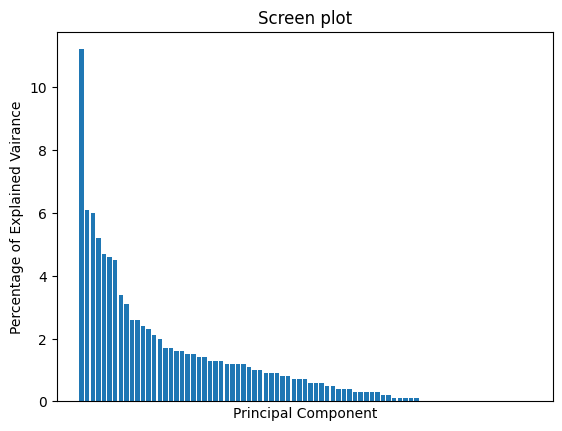

In [31]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var))]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Vairance')
plt.xlabel('Principal Component')
plt.title('Screen plot')
plt.show()

In [33]:
# PC1 accounts for a relatively large proportion in raw data, however PC2 is not much difference from the PC3 or PC4. But we don't have a option. so go for it
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

# scale the pca

pca_train_scale = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

In [62]:
param_grid = [{'C': [0.5, 1, 10, 100],
               'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
               'kernel': ['rbf']}]

# accuracy is default for scoring, remaining options does not perfomed well
optimal_param = GridSearchCV(
    svm.SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
optimal_param.fit(pca_train_scale, y_train)
print(optimal_param.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.

In [53]:
svm_clf = svm.SVC(random_state=42, C=100, gamma='scale', kernel='rbf')
svm_clf.fit(pca_train_scale, y_train)

SVC(C=100, random_state=42)

In [54]:
X_test_pca = pca.fit_transform(X_test_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

pca_test_scale = scale(np.column_stack((test_pc1_coords, test_pc2_coords)))

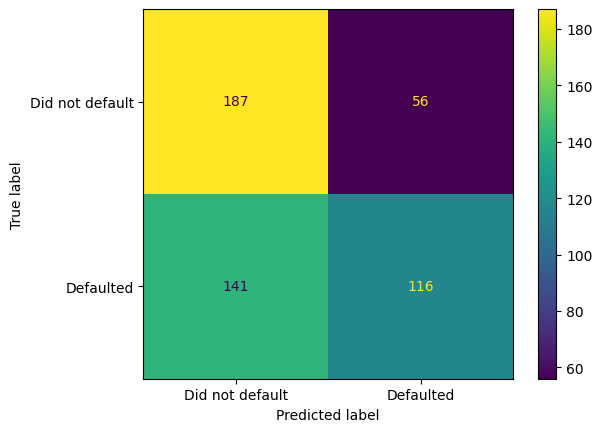

In [55]:
predictions = svm_clf.predict(pca_test_scale)
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
                       "Did not default", "Defaulted"]).plot()
plt.show()

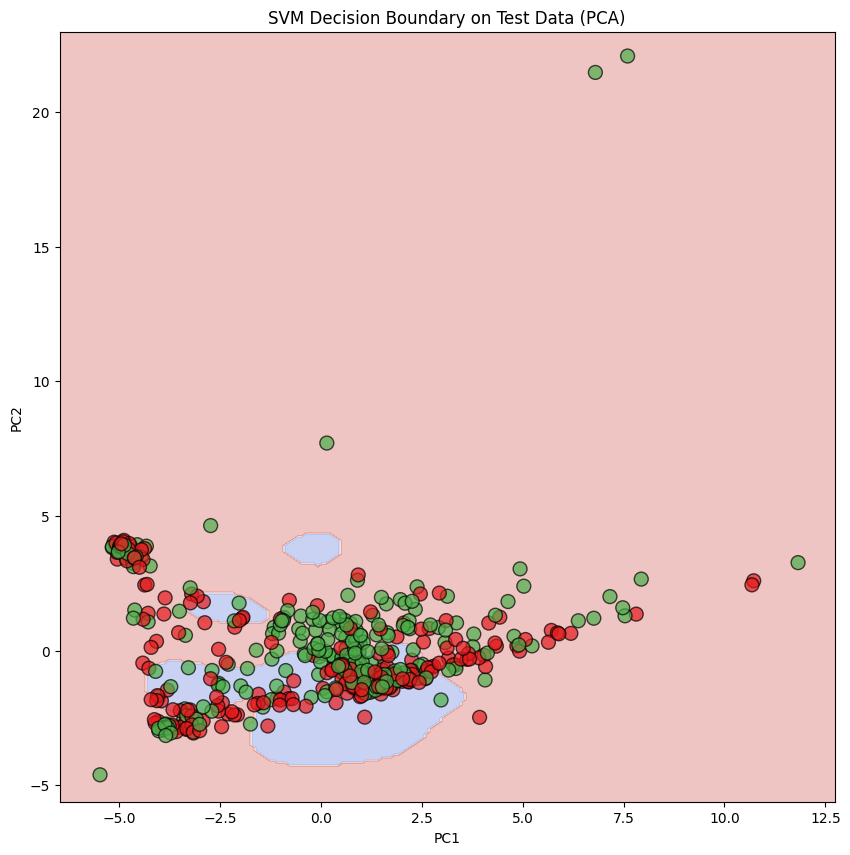

In [56]:
import matplotlib.colors as color
import numpy as np
import matplotlib.pyplot as plt

# Transform the test data using the PCA transformation from the training data
X_test_pca = pca.transform(X_test_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min, x_max = test_pc1_coords.min() - 1, test_pc1_coords.max() + 1
y_min, y_max = test_pc2_coords.min() - 1, test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

# Predict the labels for each point in the mesh grid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

cmap = color.ListedColormap(['#e41a1c', '#4daf4a'])

plt.scatter(test_pc1_coords, test_pc2_coords, c=y_test,
            cmap=cmap, s=100, edgecolors='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM Decision Boundary on Test Data (PCA)')
plt.show()

In [58]:
X = df.drop('default', axis=1).copy()
y = df['default'].copy()

In [59]:
len(X)

29932

In [60]:
X = pd.get_dummies(X, columns=[
                   'SEX', 'MARRIAGE', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']).astype(int)

In [61]:
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [64]:
svm_clf = svm.SVC()
svm_clf.fit(X_train_scaled, y_train)

SVC()

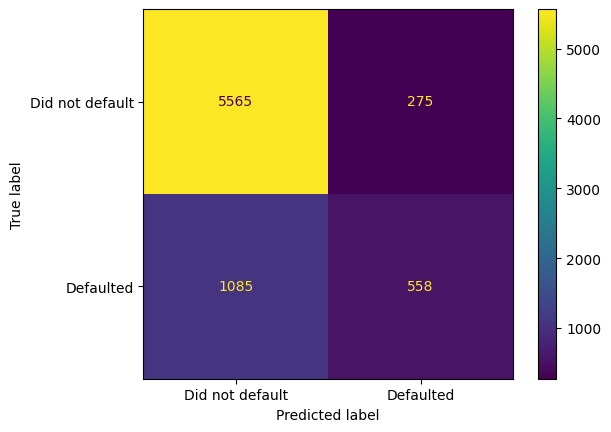

In [65]:
predictions = svm_clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
                       "Did not default", "Defaulted"]).plot()
plt.show()

In [66]:
param_grid = [{'C': [0.5, 1, 10, 100],
               'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
               'kernel': ['rbf']}]

# accuracy is default for scoring, remaining options does not perfomed well
optimal_param = GridSearchCV(
    svm.SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
optimal_param.fit(X_train_scaled, y_train)
print(optimal_param.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  16.6s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  16.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  15.7s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  15.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  15.6s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time= 1.7min
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time= 2.6min
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time= 2.8min
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time= 2.1min
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time= 2.8min
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time= 2.1min
[CV] END .......................C=0.5, gamma=0.